In [1]:
%load_ext autoreload
%autoreload 2
from skipGram import SkipGram, text2sentences, loadPairs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sentences = text2sentences('train.txt')
print(len(sentences))
true_results = loadPairs('simlex.csv')
prediction_results =pd.read_csv('results.txt', names =['similarity'])

20000


# Experiment :  
In this notebook we will explore the fiability of our model  
- try to run the model on different text size  
- try to run the model with different hyperparameter  


## Data_set_size impact 

The first figure bellow show the number of words in the dictionnary as a function of the number of sentences

In [9]:
def count_number(max_):
    l=[]
    for i in np.arange(20,max_,3000):
        sg =SkipGram(sentences[0:i])
        l.append(len(sg.w2id))
    return l

In [10]:
nbr_of_word_in_dict = count_number(20000)

Text(0, 0.5, 'nbr of distinct word')

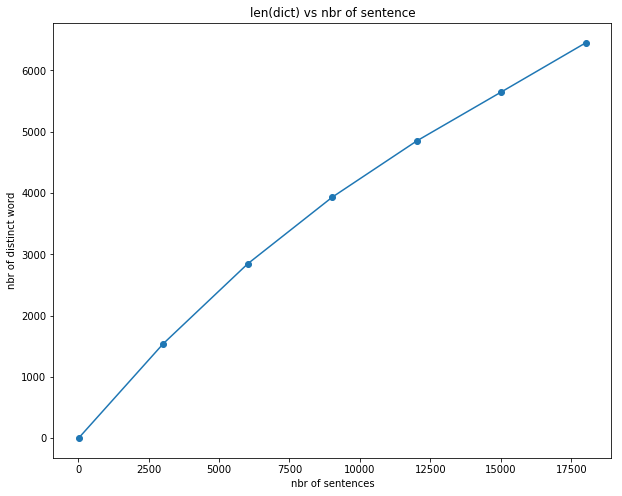

In [11]:
plt.figure(figsize=(10,8))
plt.title('len(dict) vs nbr of sentence')
plt.plot(np.arange(20,20000,3000), nbr_of_word_in_dict, marker='o')
plt.xlabel('nbr of sentences')
plt.ylabel('nbr of distinct word')

# Score  
To compute the score of our model we will compute the mean square error of our similarity against the one in simlex.csv.

#### Training on 2000 sentences 

In [10]:
nbr_sentence = 3000
sg =SkipGram(sentences[0:nbr_sentence])

In [ ]:
sg.train(5)

 > training 0 of 3000
 > training 100 of 3000
 > training 200 of 3000
 > training 300 of 3000
 > training 400 of 3000
 > training 500 of 3000
 > training 600 of 3000
 > training 700 of 3000
 > training 800 of 3000
 > training 900 of 3000
 > training 1000 of 3000


In [9]:
sg.loss

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [13]:
def test(sg):
    simil = []
    pairs = loadPairs('simlex.csv')
    for a, b, _ in pairs:
        simil.append(sg.similarity(a,b))
    return simil

In [15]:
def train(nepoch=2):
    sg.train(nepoch)    

In [57]:
nbr_sentence = 10000
sg =SkipGram(sentences[0:nbr_sentence])

In [16]:
similarity = test(sg)

/Users/antoineguiot/Documents/OMA/NLP/NLP_skip_gram/skipGram.py:191: RuntimeWarning: overflow encountered in exp
  # similarity = scalair / (np.linalg.norm(w1) * np.linalg.norm(w2))


In [18]:
np.sum(np.array(similarity)<1)

288

(array([ 4.,  1.,  2.,  7.,  9., 16., 10., 10.,  4.,  3.]),
 array([1.18205885e-88, 9.78161744e-02, 1.95632349e-01, 2.93448523e-01,
        3.91264697e-01, 4.89080872e-01, 5.86897046e-01, 6.84713221e-01,
        7.82529395e-01, 8.80345569e-01, 9.78161744e-01]),
 <a list of 10 Patch objects>)

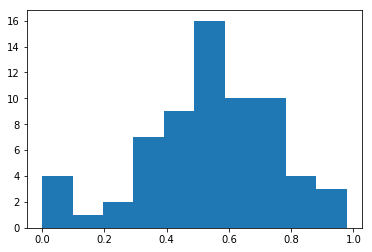

In [56]:
plt.hist(np.sort(np.array(similarity)[np.array(similarity)<1])[107:])

In [6]:
import re
re.sub(r'[0-9]+', '', ['azcd','23vf', 'RG4'])

TypeError: expected string or bytes-like object